In [1]:
import time
import re, string
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import pandas as pd
from collections import Counter
from random import randint

import scipy as sp
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance

from sklearn.cluster import KMeans
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import mixture
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd

#import matplotlib as mpl
import seaborn as sns

In [13]:
MA_Town_Data = pd.read_excel("MA_Town_Demo.xlsx")

In [15]:
MA_Town_Data.index = MA_Town_Data["Police Department"]

In [17]:
del MA_Town_Data["Police Department"]

In [18]:
MA_Town_Data

,Density per sq. mile - Pop,HS Completion Percent,Poverty Percent,Median income in 1999 (dollars) - Households,Per capita income in 1999 (dollars),Percent of total population - Race - One Race - White,Percent of total population - Race - One Race - Black or African American,Percent of total population - Race - One Race - American Indian and Alaska Native,Percent of total population - Race - One Race - Asian,Percent of total population - Race - One Race - Native Hawaiian and Other Pacific Islander,Percent of total population - Race - One Race - Some Other Race,Percent of total population - Race - Two or More Races
Police Department,,,,,,,,,,,,
ACTON POLICE DEPT,1103.6,97.9,3.1,91624,41901,77.3,1.1,0.1,18.6,0.0,1.2,1.7
AUBURN POLICE DEPT,1046.0,93.2,4.6,51753,23802,94.9,1.1,0.1,1.8,0.0,0.6,1.4
BARNSTABLE POLICE DEPT,755.7,94.6,10.7,46811,25554,89.3,3.0,0.6,1.2,0.1,2.7,3.1
BELCHERTOWN POLICE DEPT,278.3,92.7,9.5,52467,21938,93.8,1.4,0.1,2.1,0.1,0.8,1.8
BLACKSTONE POLICE DEPT,815.0,93.3,5.6,55163,20936,96.4,0.9,0.2,0.8,0.0,0.3,1.3
BROOKFIELD POLICE DEPT,218.0,88.9,10.8,45655,20144,97.3,0.3,0.1,0.2,0.0,0.1,1.9
CHARLTON POLICE DEPT,307.7,94.8,4.6,63033,23626,96.2,0.7,0.2,0.9,0.1,0.5,1.4
CHATHAM POLICE DEPARTMENT,379.7,96.5,12.7,45519,28594,96.1,1.4,0.3,0.6,0.0,0.6,1.0
CHELSEA POLICE DEPT,15901.6,67.2,19.3,30161,14628,47.8,8.5,1.1,3.1,0.0,33.6,5.9


In [19]:
MA_Town_Data.to_pickle("MA_Town_Data")

In [30]:
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=20)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_
    
    plt.figure(figsize=(20,10))
    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters', {'fontsize':20})
    plt.xticks(size=20)
    plt.ylabel('Error', {'fontsize':20})
    plt.yticks(size=20)
    plt.show()

In [28]:
evaluate_clusters(MA_Town_Data,25) 

In [36]:
kmeans = KMeans(init='k-means++', n_clusters=15, n_init=100)
kmeans.fit_predict(MA_Town_Data)
kmeans_centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_

In [37]:
print(kmeans_labels)

[ 9  2  1  2  2  5  3  1 10  7  1  0  5  2  2  2  4  3  4  9 13  4  5  7 11
 14 13  3  1  2 14  0 13 14  3  5  2  0  5  8 14 11 10  5  9 14  4 12 13 12
 13  3  4 14 13 11  2  2  2  3  8  2  7  2  8  0  2  3  0 11  3  1  2  5 13
 14  1  3  4  2 14  1  1  2  8  2  2  4  7  7 14  8  2  5  2 14  9 13  5  8
  5  7 11  5  6  1  4  2  5  5 14 14  7]


In [38]:
print(kmeans_centroids)

[[  6.69620000e+02   9.60800000e+01   4.38000000e+00   8.47186000e+04
    3.76330000e+04   9.48200000e+01   1.64000000e+00   1.60000000e-01
    1.70000000e+00   0.00000000e+00   5.40000000e-01   1.10000000e+00]
 [  2.30555556e+03   9.28222222e+01   1.07000000e+01   4.51256667e+04
    2.57207778e+04   8.80000000e+01   2.75555556e+00   3.00000000e-01
    3.83333333e+00   4.44444444e-02   2.94444444e+00   2.07777778e+00]
 [  8.00713636e+02   9.08681818e+01   7.81363636e+00   5.12155000e+04
    2.23460455e+04   9.37318182e+01   1.65909091e+00   1.90909091e-01
    1.31363636e+00   9.09090909e-03   1.47727273e+00   1.58636364e+00]
 [  5.75855556e+02   9.41777778e+01   4.67777778e+00   6.26037778e+04
    2.47423333e+04   9.56333333e+01   9.77777778e-01   1.33333333e-01
    1.28888889e+00   3.33333333e-02   6.00000000e-01   1.32222222e+00]
 [  1.24055875e+04   8.44125000e+01   1.81750000e+01   3.99903750e+04
    2.17593750e+04   6.05000000e+01   1.70500000e+01   4.25000000e-01
    7.71250000e+

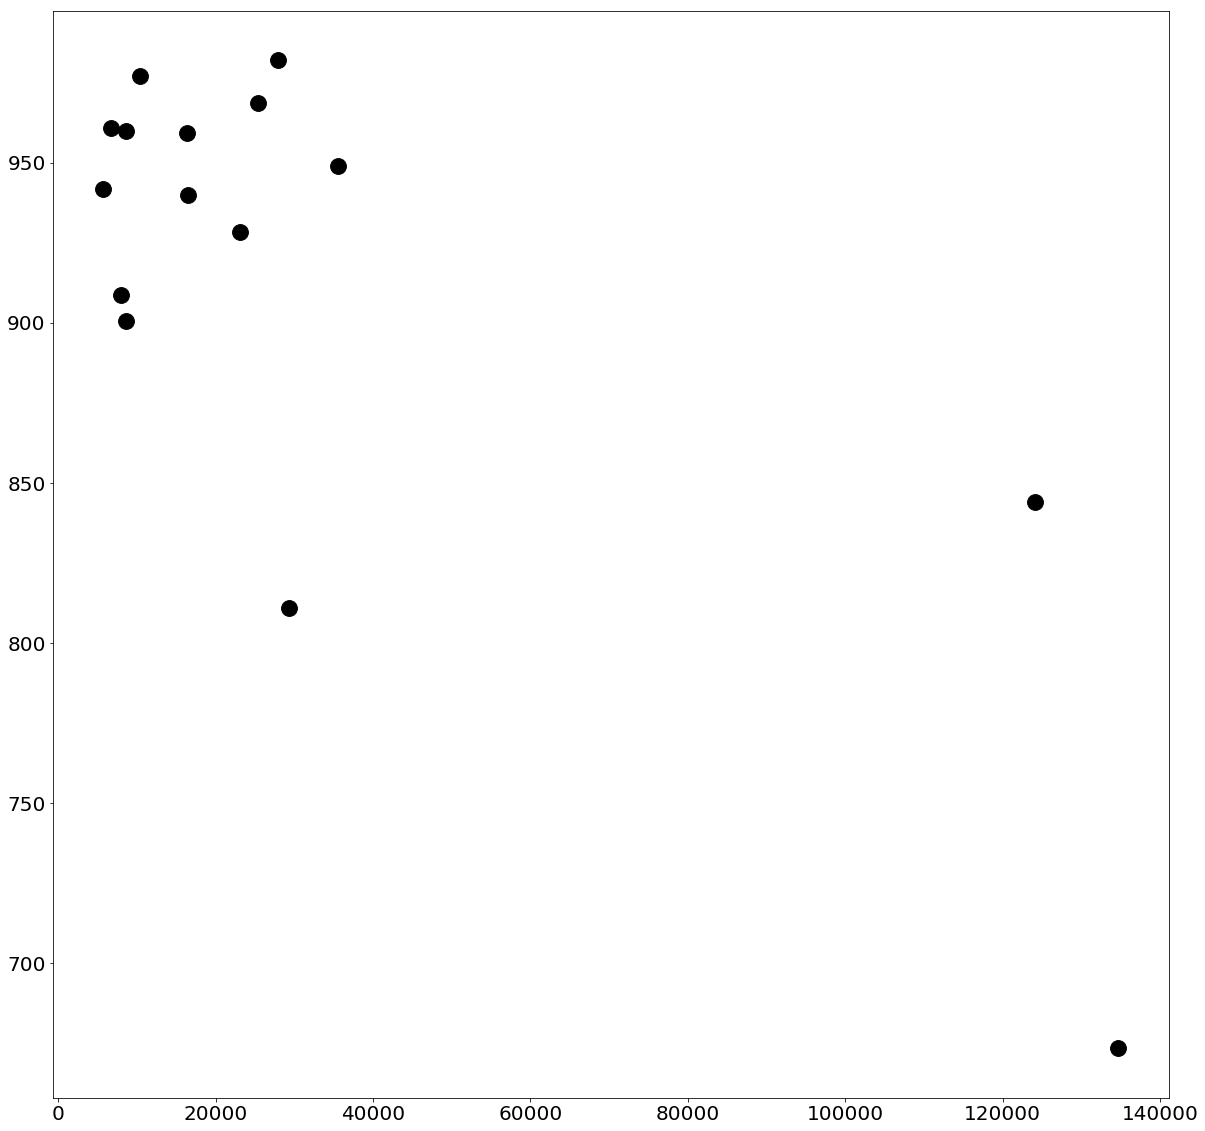

In [39]:
plt.rcParams["figure.figsize"] = (20,20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.scatter(kmeans_centroids[:,0]*10, kmeans_centroids[:,1]*10, s = 250, c='k')
plt.show()